In [2]:
import numpy as np

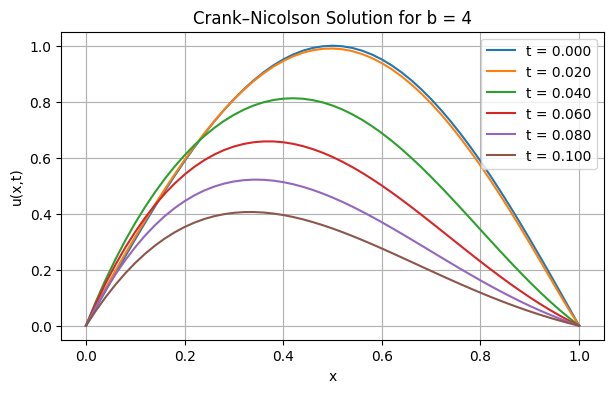

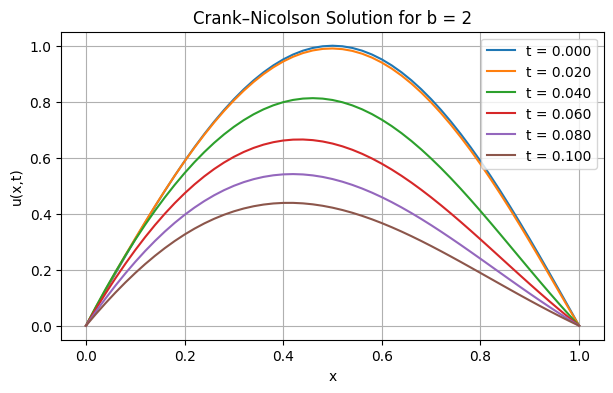

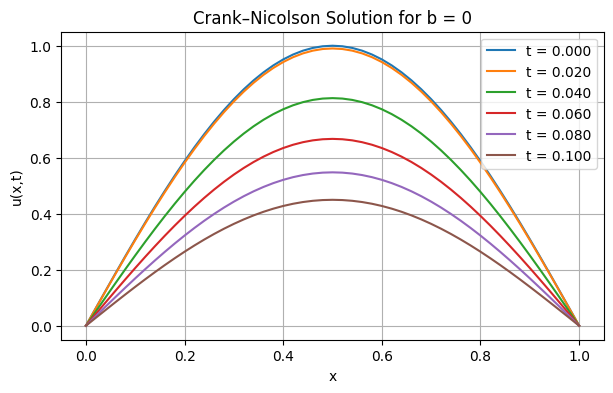

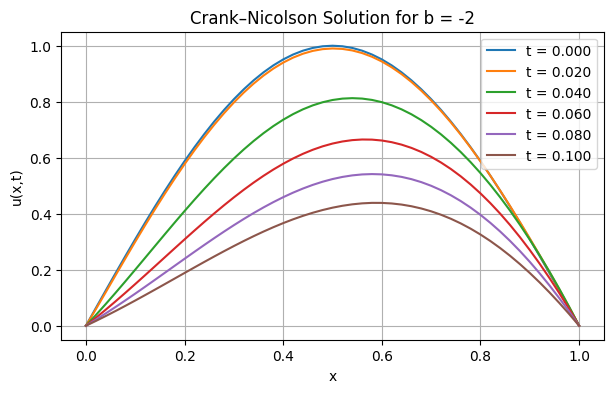

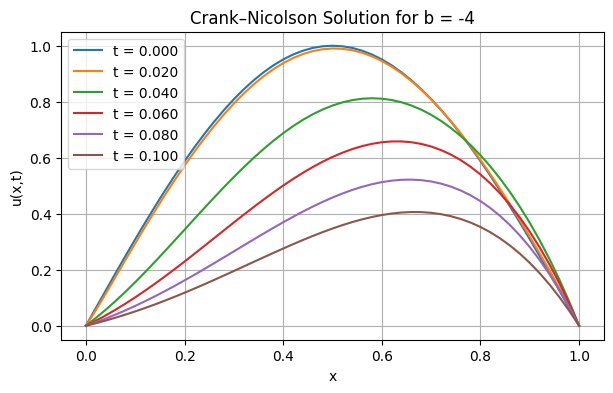

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0         # length of the domain
Nx = 51         # number of spatial grid points
dx = L / (Nx - 1)
dt = 0.001      # time step
T = 0.1         # total simulation time
Nt = int(T / dt)
x = np.linspace(0, L, Nx)

# Function to implement Crank-Nicolson for given b
def crank_nicolson(b):
    alpha = dt / (2 * dx**2)
    beta = b * dt / (4 * dx)
    
    # Construct matrices A and B
    A = np.zeros((Nx, Nx))
    B = np.zeros((Nx, Nx))

    for i in range(1, Nx - 1):
        A[i, i - 1] = -alpha + beta
        A[i, i]     = 1 + 2 * alpha
        A[i, i + 1] = -alpha - beta

        B[i, i - 1] = alpha - beta
        B[i, i]     = 1 - 2 * alpha
        B[i, i + 1] = alpha + beta

    # Boundary conditions
    A[0, 0] = A[-1, -1] = 1
    B[0, 0] = B[-1, -1] = 1

    # Initial condition
    u = np.sin(np.pi * x)
    u[0], u[-1] = 0, 0

    results = [u.copy()]

    for n in range(Nt):
        rhs = B @ u
        rhs[0] = rhs[-1] = 0   # enforce BCs
        u_new = np.linalg.solve(A, rhs)
        u = u_new
        if n % (Nt // 5) == 0:
            results.append(u.copy())
    
    return results

# Solve for different b values
b_values = [4, 2, 0, -2, -4]

for b in b_values:
    results = crank_nicolson(b)
    plt.figure(figsize=(7, 4))
    for i, u in enumerate(results):
        plt.plot(x, u, label=f"t = {i * (T/5):.3f}")
    plt.title(f"Crank–Nicolson Solution for b = {b}")
    plt.xlabel("x")
    plt.ylabel("u(x,t)")
    plt.legend()
    plt.grid(True)
    plt.show()
